In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

In [35]:
data_2d = pd.read_csv("data_2d.csv")
X_2d = data_2d.values

In [36]:
mnist = load_digits()
X_mnist = mnist.data

In [37]:
X_artificial, _ = make_blobs(n_samples=1000, centers=3, random_state=42)

In [38]:
def find_optimal_clusters(data, max_k):
    inertias = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    return inertias

In [39]:
max_clusters = 10
inertias_2d = find_optimal_clusters(X_2d, max_clusters)
inertias_artificial = find_optimal_clusters(X_artificial, max_clusters)
inertias_mnist = find_optimal_clusters(X_mnist, max_clusters)

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

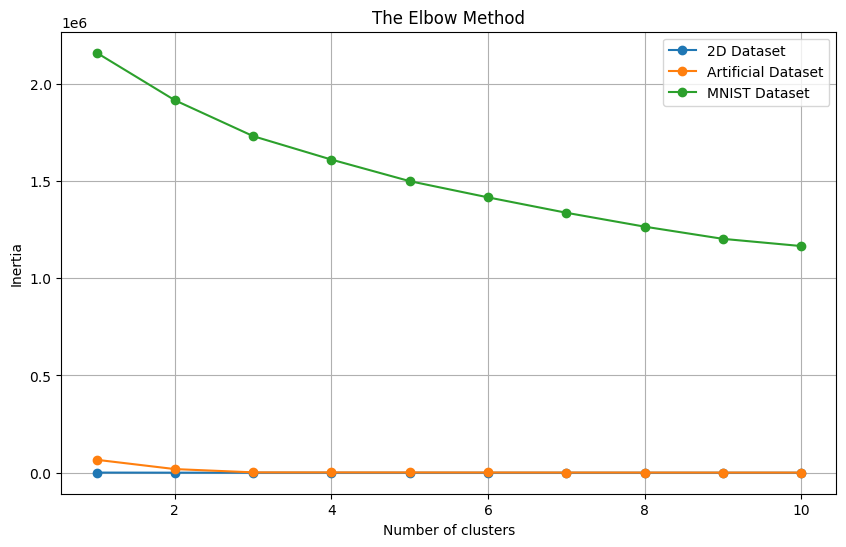

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), inertias_2d, marker='o', label='2D Dataset')
plt.plot(range(1, max_clusters + 1), inertias_artificial, marker='o', label='Artificial Dataset')
plt.plot(range(1, max_clusters + 1), inertias_mnist, marker='o', label='MNIST Dataset')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
def visualize_clusters(data, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.grid(True)
    plt.show()

In [42]:
pca = PCA(n_components=2)

In [43]:
pca_2d = pca.fit_transform(X_2d)

In [44]:
pca_artificial = pca.fit_transform(X_artificial)

In [45]:
pca_mnist = pca.fit_transform(X_mnist)

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


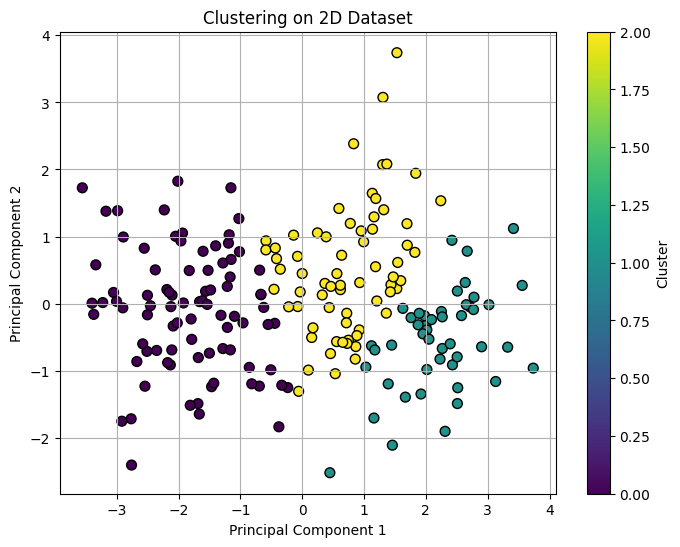

In [46]:
kmeans_2d = KMeans(n_clusters=3, random_state=42)
labels_2d = kmeans_2d.fit_predict(pca_2d)
visualize_clusters(pca_2d, labels_2d, 'Clustering on 2D Dataset')

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


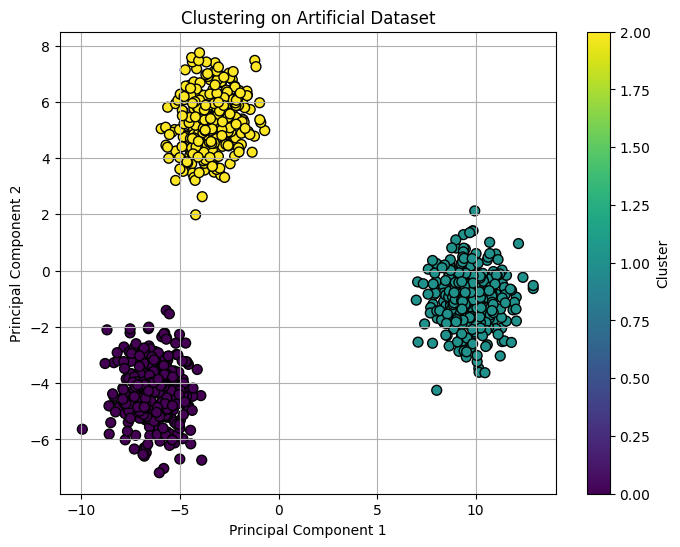

In [47]:
kmeans_artificial = KMeans(n_clusters=3, random_state=42)
labels_artificial = kmeans_artificial.fit_predict(pca_artificial)
visualize_clusters(pca_artificial, labels_artificial, 'Clustering on Artificial Dataset')

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


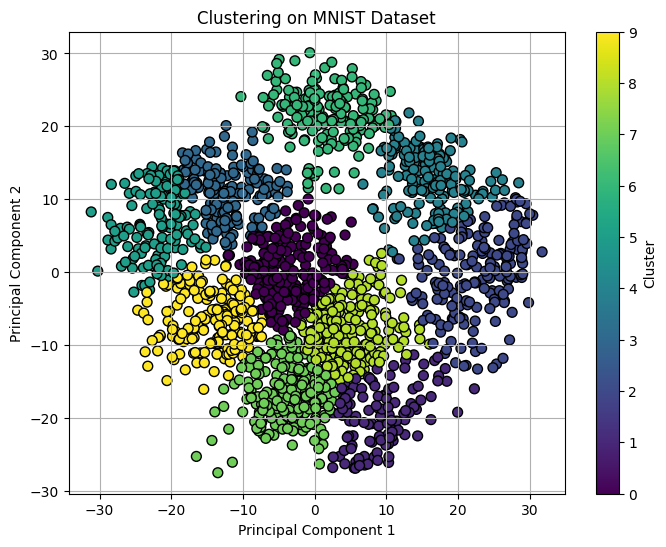

In [48]:
kmeans_mnist = KMeans(n_clusters=10, random_state=42)
labels_mnist = kmeans_mnist.fit_predict(pca_mnist)
visualize_clusters(pca_mnist, labels_mnist, 'Clustering on MNIST Dataset')